In [2]:
!pip install pydub



  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pydub-0.25.1-py2.py3-none-any.whl (32 kB)


In [3]:
from pydub.utils import which
print(which("ffmpeg"))


None


C:\Users\luffy\anaconda\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [4]:
from pydub import AudioSegment

AudioSegment.converter = r"E:\Downloads\ffmpeg-7.1.1-essentials_build\bin\ffmpeg.exe"


In [6]:
from pydub import AudioSegment
from pydub.utils import which

# Set FFmpeg path manually if not auto-detected
AudioSegment.converter = r"E:\Downloads\ffmpeg-7.1.1-full_build\bin\ffmpeg.exe"

# Confirm it's set
print("FFmpeg Path:", AudioSegment.converter)


FFmpeg Path: E:\Downloads\ffmpeg-7.1.1-full_build\bin\ffmpeg.exe


In [16]:
!pip install librosa torch numpy matplotlib scikit-learn tqdm pydub

In [17]:
pip show torch


Name: torchNote: you may need to restart the kernel to use updated packages.

Version: 2.6.0
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: C:\Users\luffy\anaconda\Lib\site-packages
Requires: filelock, fsspec, jinja2, networkx, setuptools, sympy, typing-extensions
Required-by: 


In [8]:
pip install pytube pydub librosa numpy scikit-learn


In [1]:
import os
import numpy as np
import pandas as pd
import librosa
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Paths to the datasets
tess_dir = r"E:\Downloads\TESS Toronto emotional speech set data"
ravdess_dir = r"E:\Downloads\archive\RAVDESS"

# Emotion mapping
emotion_map = {
    'angry': 'angry', 'disgust': 'disgust', 'fear': 'fear', 'happy': 'happy',
    'neutral': 'neutral', 'ps': 'surprise', 'sad': 'sad',
    '01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad',
    '05': 'angry', '06': 'fear', '07': 'disgust', '08': 'surprise'
}

# Feature extraction function
def extract_audio_features(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    stft = np.abs(librosa.stft(y))
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis=0)
    f0, _, _ = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
    pitch = np.nanmean(f0) if f0 is not None else 0
    zcr = np.mean(librosa.feature.zero_crossing_rate(y).T, axis=0)
    rms = np.mean(librosa.feature.rms(y=y).T, axis=0)
    cent = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr).T, axis=0)
    bw = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr).T, axis=0)
    return np.hstack([mfcc, chroma, mel, pitch, zcr, rms, cent, bw])

# Load dataset paths and labels
def load_dataset(tess_dir, ravdess_dir):
    data = []
    # TESS dataset
    for root, _, files in os.walk(tess_dir):
        for file in files:
            if file.endswith(".wav"):
                path = os.path.join(root, file)
                label = file.split('_')[-1].split('.')[0].lower()
                if label in emotion_map:
                    data.append([path, emotion_map[label]])

    # RAVDESS dataset
    for root, _, files in os.walk(ravdess_dir):
        for file in files:
            if file.endswith(".wav"):
                path = os.path.join(root, file)
                label_code = file.split('-')[2]
                if label_code in emotion_map:
                    data.append([path, emotion_map[label_code]])

    return pd.DataFrame(data, columns=["path", "emotion"])

# Load data
df = load_dataset(tess_dir, ravdess_dir)

# Extract features
X_features = df['path'].apply(extract_audio_features)
X = np.array(X_features.tolist())

# Encode labels
le = LabelEncoder()
y = le.fit_transform(df['emotion'])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

accuracy, report


c:\Users\luffy\anaconda\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
c:\Users\luffy\anaconda\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
c:\Users\luffy\anaconda\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,
C:\Users\luffy\AppData\Local\Temp\ipykernel_18868\1379775015.py:30: RuntimeWarning: Mean of empty slice
  pitch = np.nanmean(f0) if f0 is not None else 0


(0.9693396226415094,
 '              precision    recall  f1-score   support\n\n       angry       1.00      0.97      0.99       237\n        calm       0.90      0.92      0.91        76\n     disgust       0.94      0.94      0.94       237\n        fear       0.97      0.97      0.97       237\n       happy       0.99      0.97      0.98       237\n     neutral       1.00      0.99      0.99       198\n         sad       0.95      0.97      0.96       237\n    surprise       0.96      0.99      0.98       237\n\n    accuracy                           0.97      1696\n   macro avg       0.96      0.97      0.96      1696\nweighted avg       0.97      0.97      0.97      1696\n')

Predicted Emotion: fearful

Emotion Embeddings (Probabilities):
angry: 0.1700
calm: 0.0000
disgust: 0.0400
fearful: 0.3000
happy: 0.2400
neutral: 0.0100
sad: 0.0400
surprised: 0.2000


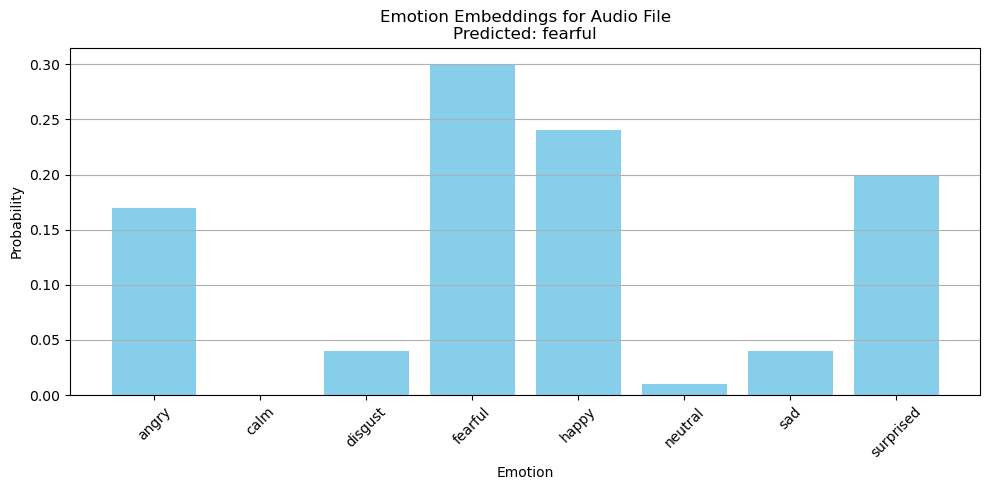

In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Function to extract features
def extract_audio_features(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    stft = np.abs(librosa.stft(y))
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis=0)
    f0, _, _ = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
    pitch = np.nanmean(f0) if f0 is not None else 0
    zcr = np.mean(librosa.feature.zero_crossing_rate(y).T, axis=0)
    rms = np.mean(librosa.feature.rms(y=y).T, axis=0)
    cent = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr).T, axis=0)
    bw = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr).T, axis=0)
    return np.hstack([mfcc, chroma, mel, pitch, zcr, rms, cent, bw])

# Replace this with your audio file path
external_audio_path = r"E:\Downloads\woman crying and sobbing SoundEffectsFactory.mp3"

# Emotion labels dictionary
emotion_labels = {
    0: 'angry',
    1: 'calm',
    2: 'disgust',
    3: 'fearful',
    4: 'happy',
    5: 'neutral',
    6: 'sad',
    7: 'surprised'
}

# Extract features
external_features = extract_audio_features(external_audio_path).reshape(1, -1)

# Predict
predicted_probs = model.predict_proba(external_features)[0]
predicted_idx = np.argmax(predicted_probs)
predicted_emotion = emotion_labels[predicted_idx]

# Emotion embeddings
emotion_embeddings = {emotion_labels[i]: prob for i, prob in enumerate(predicted_probs)}

# --------------- Final Display ----------------
print(f"Predicted Emotion: {predicted_emotion}\n")
print("Emotion Embeddings (Probabilities):")
for emotion, prob in emotion_embeddings.items():
    print(f"{emotion}: {prob:.4f}")

# --------------- Plotting ----------------
plt.figure(figsize=(10, 5))
plt.bar(emotion_embeddings.keys(), emotion_embeddings.values(), color='skyblue')
plt.title(f'Emotion Embeddings for Audio File\nPredicted: {predicted_emotion}')
plt.xlabel('Emotion')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()









In [3]:
import joblib

# Assume your trained model is called "model"
joblib.dump(model, "emotion_model.pkl")


['emotion_model.pkl']

In [4]:
import pickle

# Save model
with open('emotion_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save label encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)


NameError: name 'label_encoder' is not defined

In [5]:
import sklearn
print(sklearn.__version__)


1.5.1


In [6]:
pip install scikit-learn==1.3.0



     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     --------- ------------------------------ 1.8/7.5 MB 9.1 MB/s eta 0:00:01
     ----------------------- ---------------- 4.5/7.5 MB 9.9 MB/s eta 0:00:01
     ------------------------------------ --- 6.8/7.5 MB 10.5 MB/s eta 0:00:01
     ---------------------------------------  7.3/7.5 MB 10.8 MB/s eta 0:00:01
     ---------------------------------------- 7.5/7.5 MB 7.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [53 lines of output]
      Partial import of sklearn during the build process.
      test_program.c
      test_program.c(1): fatal error C1083: Cannot open include file: 'stdio.h': No such file or directory
      Traceback (most recent call last):
        File "C:\Users\luffy\AppData\Local\Temp\pip-build-env-x684zjvo\overlay\Lib\site-packages\setuptools\_distutils\spawn.py", line 87, in spawn
          subprocess.check_call(cmd, env=_inject_macos_ver(env))
        File "c:\Users\luffy\anaconda\Lib\subprocess.py", line 413, in check_call
          raise CalledProcessError(retcode, cmd)
      subprocess.CalledProcessError: Command '['C:\\Program Files (x86)\\Microsoft Visual Studio\\2022\\BuildTools\\VC\\Tools\\MSVC\\14.41.34120\\bin\\HostX86\\x64\\cl.exe', '/c', '/nologo', '/O2', '/W3', '/GL', '/DNDEBUG', '/MD', '-IC:\\Program Files (x86)\\Microsoft Visual St

In [7]:
import pickle

with open('emotion_model.pkl', 'rb') as file:
    model = pickle.load(file)
